#extracting data from given url

In [5]:
import requests
import json
import pandas as pd

def download_data(api_url):
    # Send a GET request to the API URL
    response = requests.get(api_url)

    if response.status_code == 200:
        # Extract the JSON data from the response
        data = response.json()

        # Convert the JSON data to a pandas DataFrame
        df = pd.DataFrame(data["pokemon"])

        return df

    else:
        print("Failed to download data. Status code:", response.status_code)
        return None

# API URL for the Pokemon data
api_url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

# Download the data and convert it to a DataFrame
pokemon_df = download_data(api_url)

# Check if the data was successfully downloaded and converted
if pokemon_df is not None:
    # Export the DataFrame to Excel
    pokemon_df.to_excel("pokemon_data.xlsx", index=False)
    print("Data exported to pokemon_data.xlsx")




Data exported to pokemon_data.xlsx


In [25]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import ast

In [7]:
#IMPORTING DATASET
pokemon_df = pd.read_excel("pokemon_data.xlsx")

In [8]:
pokemon_df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,[1.65],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,[1.79],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


In [9]:
pokemon_df.shape

(151, 17)

In [10]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              151 non-null    int64  
 1   num             151 non-null    int64  
 2   name            151 non-null    object 
 3   img             151 non-null    object 
 4   type            151 non-null    object 
 5   height          151 non-null    object 
 6   weight          151 non-null    object 
 7   candy           151 non-null    object 
 8   candy_count     70 non-null     float64
 9   egg             151 non-null    object 
 10  spawn_chance    151 non-null    float64
 11  avg_spawns      151 non-null    float64
 12  spawn_time      145 non-null    object 
 13  multipliers     70 non-null     object 
 14  weaknesses      151 non-null    object 
 15  next_evolution  70 non-null     object 
 16  prev_evolution  72 non-null     object 
dtypes: float64(3), int64(2), object(12)

Get all Pokemons whose spawn rate is less than 5%

In [3]:


# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_less_than_5 = pokemon_df[pokemon_df["spawn_chance"] < 5]

spawn_rate_less_than_5


,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,[1.58],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,[1.65],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,['Dragon'],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"[1.83, 1.84]","['Ice', 'Dragon', 'Fairy']","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,['Dragon'],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,[2.05],"['Ice', 'Dragon', 'Fairy']","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"['Dragon', 'Flying']",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,NaN,"['Ice', 'Rock', 'Dragon', 'Fairy']",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"['Bug', 'Ghost', 'Dark']",NaN,NaN


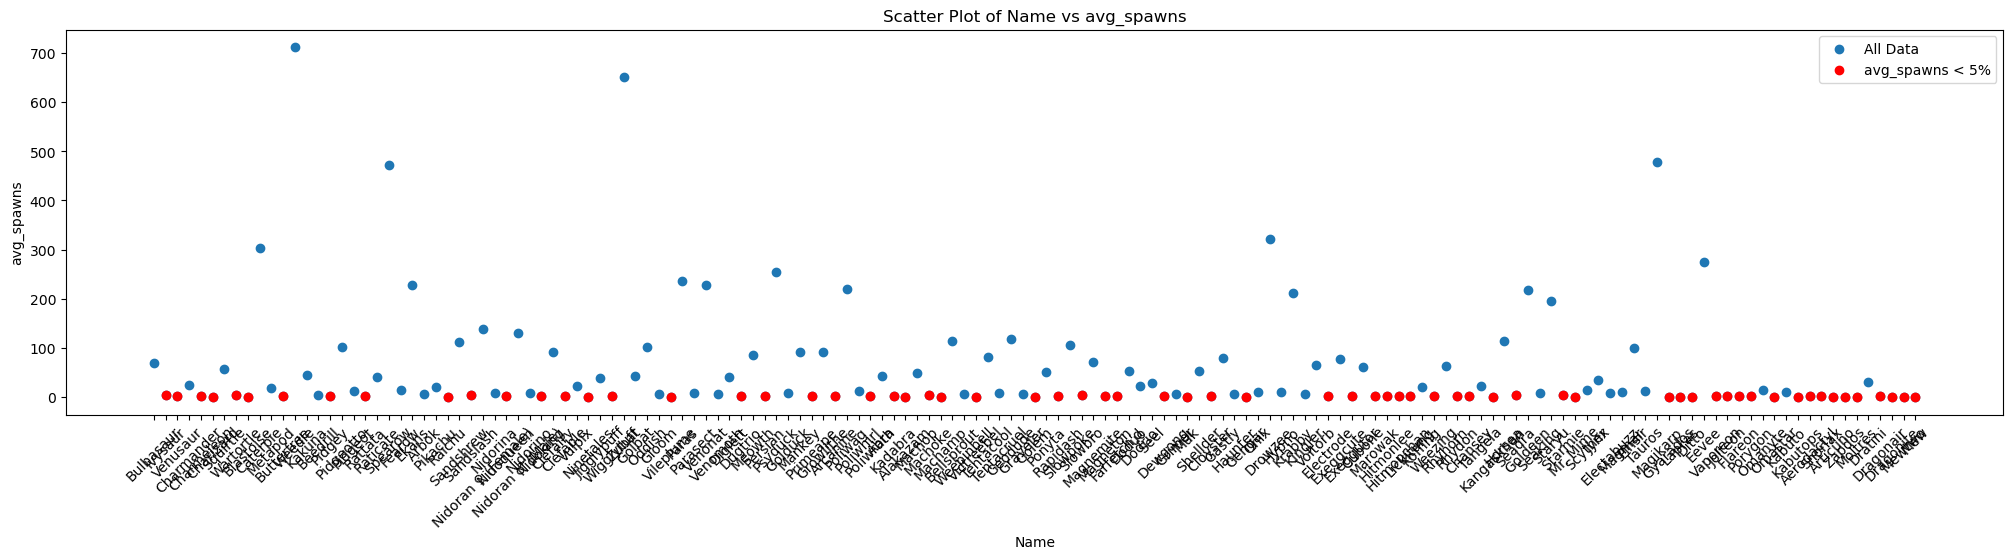

In [18]:
## We can get spwan rate from the avg_spawns column

# Filter the DataFrame for rows where 'avg_spwan' is less than 5%
filtered_df = pokemon_df[pokemon_df['avg_spawns'] < 5]

# Plot the 'name' column against the 'avg_spwan' column
plt.figure(figsize=(25,5))
plt.scatter(pokemon_df['name'], pokemon_df['avg_spawns'], label='All Data')
plt.scatter(filtered_df['name'], filtered_df['avg_spawns'], color='red', label='avg_spawns < 5%')
plt.xlabel('Name')
plt.ylabel('avg_spawns')
plt.title('Scatter Plot of Name vs avg_spawns')
plt.xticks(rotation=45)
plt.legend()
plt.show()

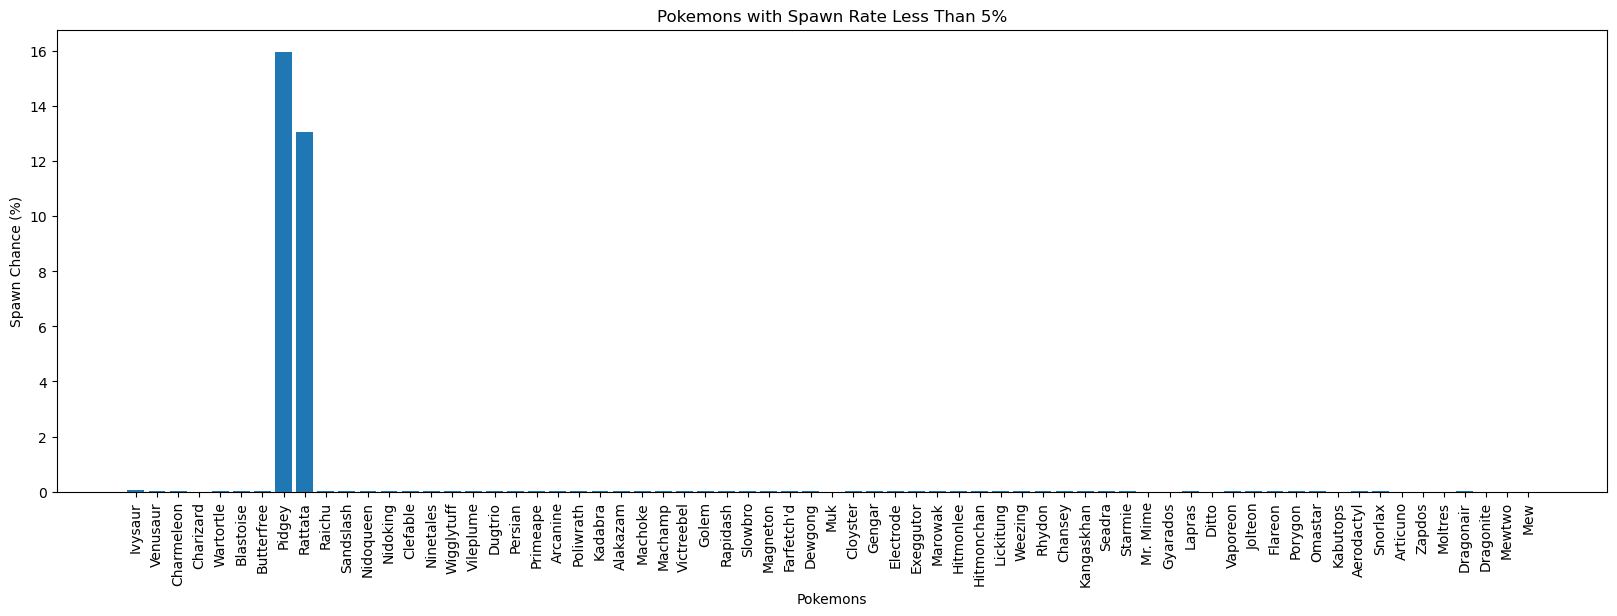

In [19]:
# Bar plot for spawn rate less than 5%
plt.figure(figsize=(20, 6))
plt.bar(filtered_df["name"],filtered_df["spawn_chance"])
plt.xlabel("Pokemons")
plt.ylabel("Spawn Chance (%)")
plt.title("Pokemons with Spawn Rate Less Than 5%")
plt.xticks(rotation=90)
plt.show()

In [22]:
filtered_df[["name","avg_spawns"]]

,name,avg_spawns
1,Ivysaur,4.20
2,Venusaur,1.70
4,Charmeleon,1.20
5,Charizard,0.31
7,Wartortle,3.40
...,...,...
145,Moltres,0.00
147,Dragonair,2.00
148,Dragonite,0.11
149,Mewtwo,0.00


Conclusions:

There are 67 pokemons whose spwan rate is less than 5%.

#Get all Pokemons that have less than 4 weaknesses

In [23]:
# type checking
type(pokemon_df["weaknesses"][1])

str

In [29]:
pokemon_df["weaknesses"][1]

['Fire', 'Ice', 'Flying', 'Psychic']

In [26]:
# we need to convert it into actual list of strings using ast.literal_eval() function from ast module

pokemon_df["weaknesses"] = pokemon_df["weaknesses"].apply(lambda x: ast.literal_eval(x))

In [27]:
# type checking
type(pokemon_df["weaknesses"][1])

list

In [28]:
# count the number of weaknesses
len(pokemon_df["weaknesses"][1])

4

In [31]:
# Now we can create another column for weaknesses count using len() function in apply() method

pokemon_df["weaknesses_count"] = pokemon_df["weaknesses"].apply(lambda x: len(x))
pokemon_df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weaknesses_count
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,4
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,NaN,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",4
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3


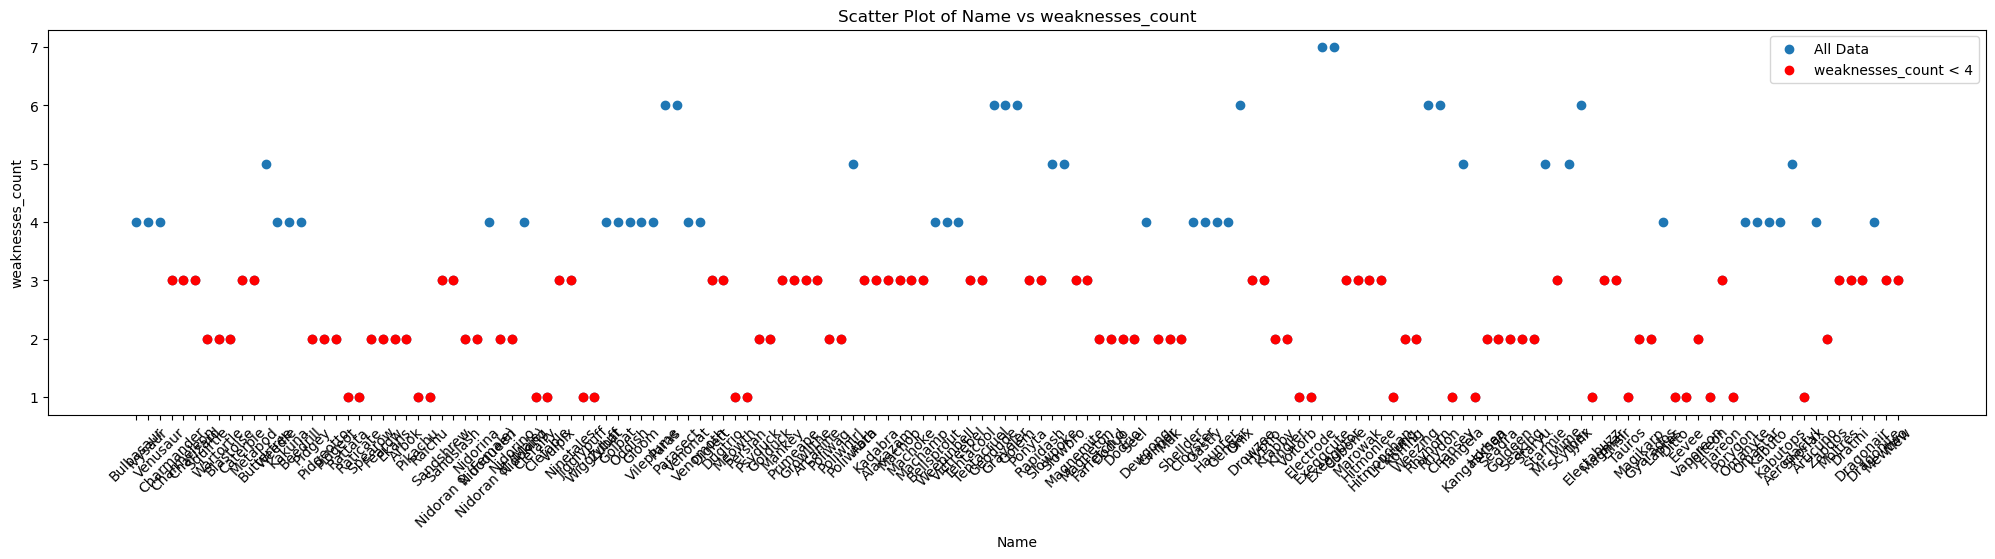

In [32]:
# Filter the DataFrame for rows where 'avg_spwan' is less than 5%
filtered_df = pokemon_df[pokemon_df['weaknesses_count'] < 4]

# Plot the 'name' column against the 'avg_spwan' column
plt.figure(figsize=(25,5))
plt.scatter(pokemon_df['name'], pokemon_df['weaknesses_count'], label='All Data')
plt.scatter(filtered_df['name'], filtered_df['weaknesses_count'], color='red', label='weaknesses_count < 4')
plt.xlabel('Name')
plt.ylabel('weaknesses_count')
plt.title('Scatter Plot of Name vs weaknesses_count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

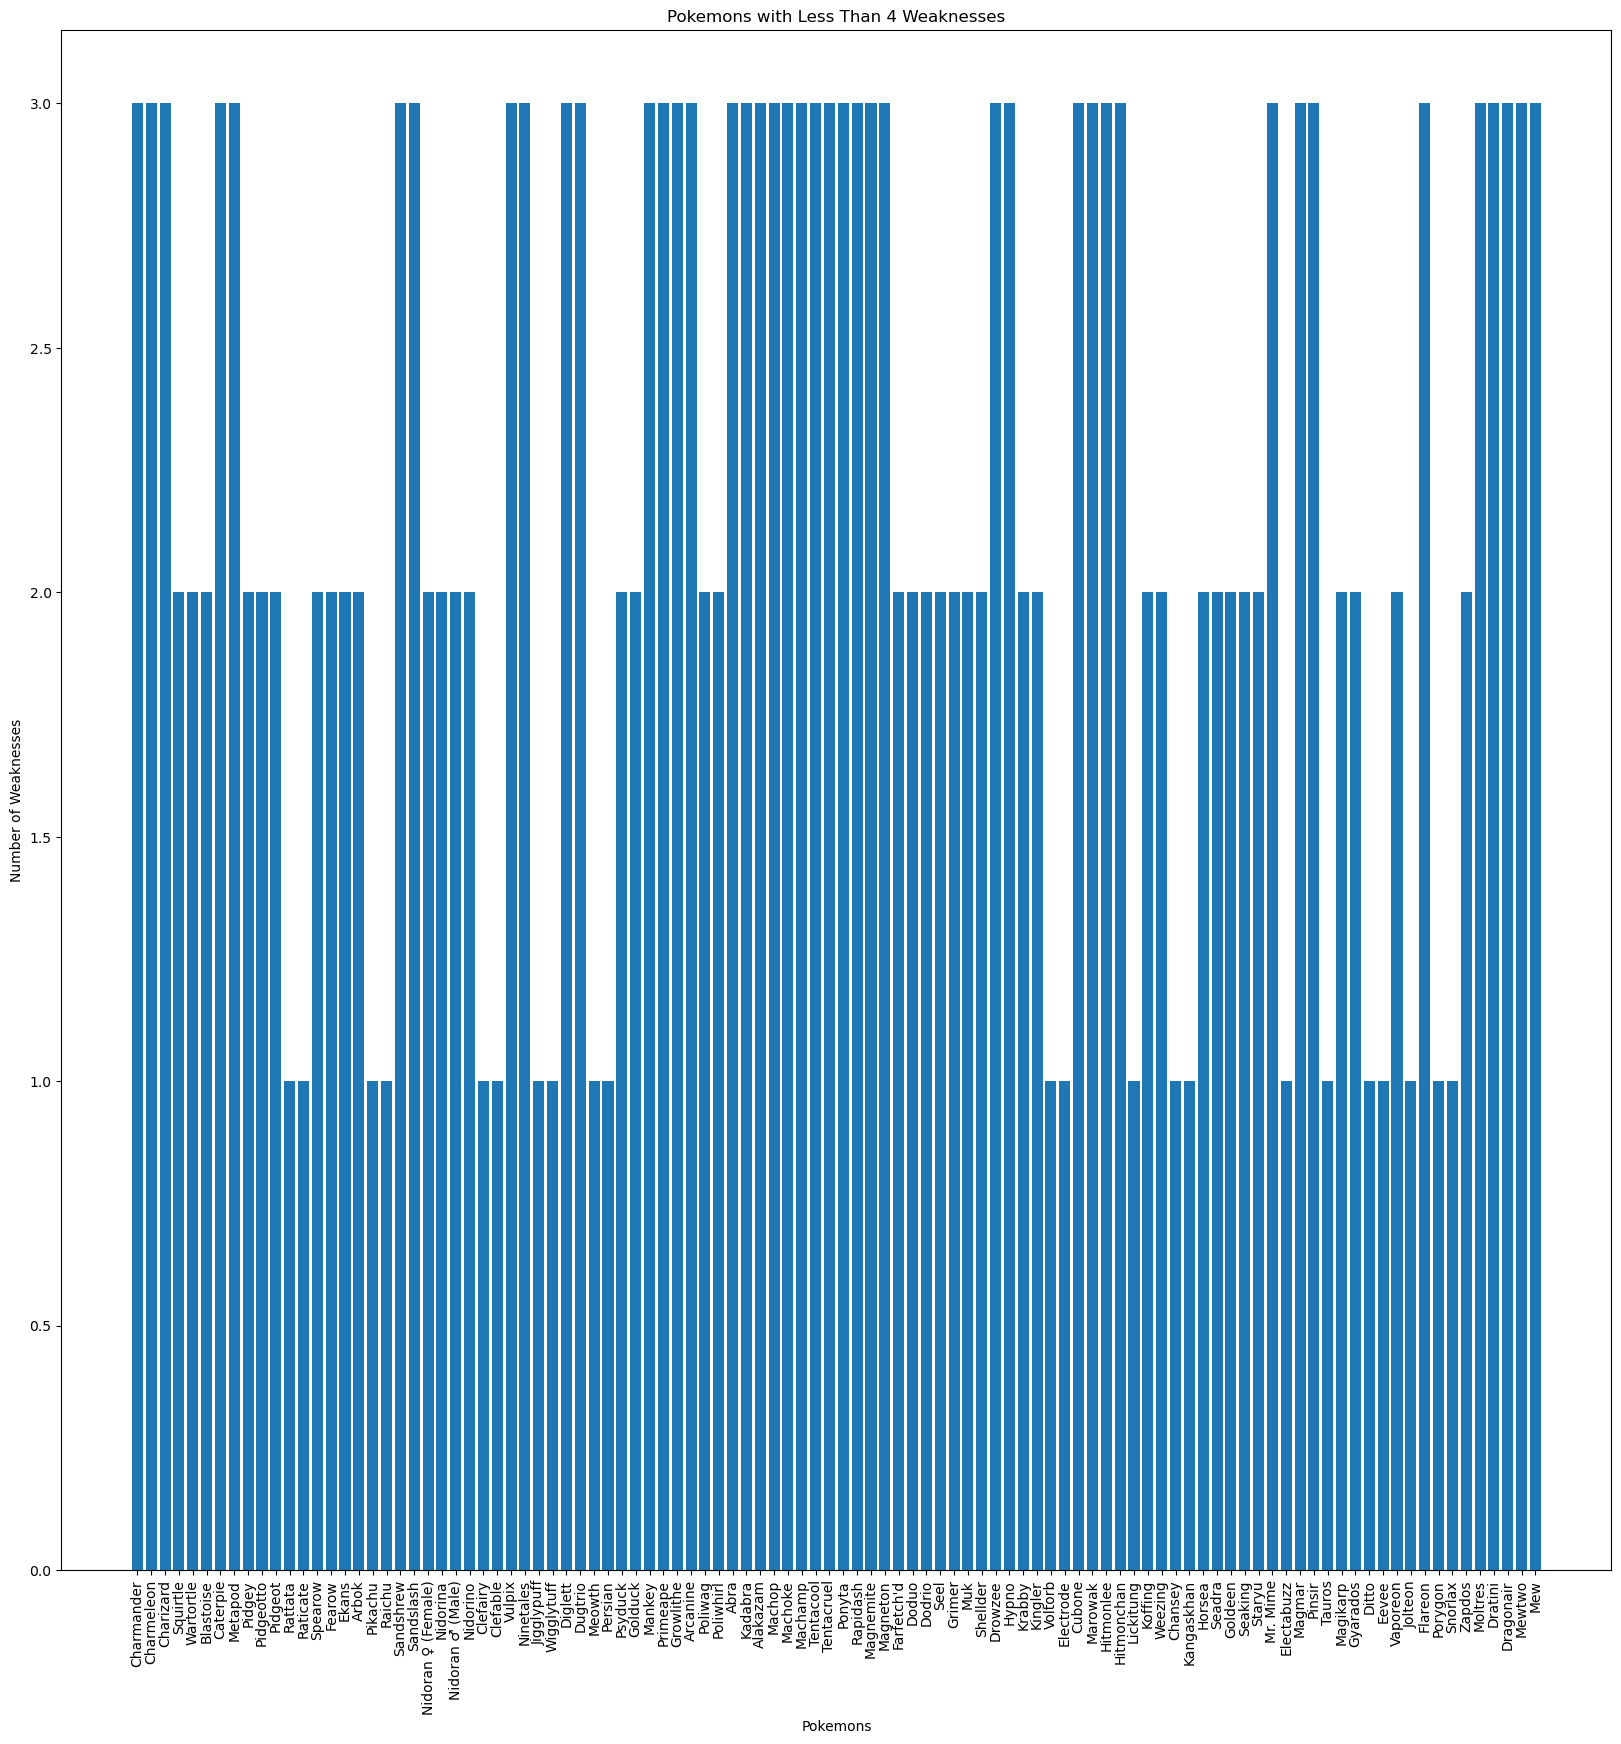

In [45]:
# Bar plot for Pokemons with less than 4 weaknesses
plt.figure(figsize=(20,20))
plt.bar(filtered_df ["name"], filtered_df ["weaknesses"].str.len())
plt.xlabel("Pokemons")
plt.ylabel("Number of Weaknesses")
plt.title("Pokemons with Less Than 4 Weaknesses")
plt.xticks(rotation=90)
plt.show()

In [39]:
filtered_df[["name", "weaknesses_count"]]

,name,weaknesses_count
3,Charmander,3
4,Charmeleon,3
5,Charizard,3
6,Squirtle,2
7,Wartortle,2
...,...,...
145,Moltres,3
146,Dratini,3
147,Dragonair,3
149,Mewtwo,3


Conclusion:

There are 102 pokemons who have less than 4 weaknesses.

# Get all Pokemons that have no multipliers at all

      id  num        name                                               img  \
2      3    3    Venusaur  http://www.serebii.net/pokemongo/pokemon/003.png   
5      6    6   Charizard  http://www.serebii.net/pokemongo/pokemon/006.png   
8      9    9   Blastoise  http://www.serebii.net/pokemongo/pokemon/009.png   
11    12   12  Butterfree  http://www.serebii.net/pokemongo/pokemon/012.png   
14    15   15    Beedrill  http://www.serebii.net/pokemongo/pokemon/015.png   
..   ...  ...         ...                                               ...   
144  145  145      Zapdos  http://www.serebii.net/pokemongo/pokemon/145.png   
145  146  146     Moltres  http://www.serebii.net/pokemongo/pokemon/146.png   
148  149  149   Dragonite  http://www.serebii.net/pokemongo/pokemon/149.png   
149  150  150      Mewtwo  http://www.serebii.net/pokemongo/pokemon/150.png   
150  151  151         Mew  http://www.serebii.net/pokemongo/pokemon/151.png   

                       type  height    weight      

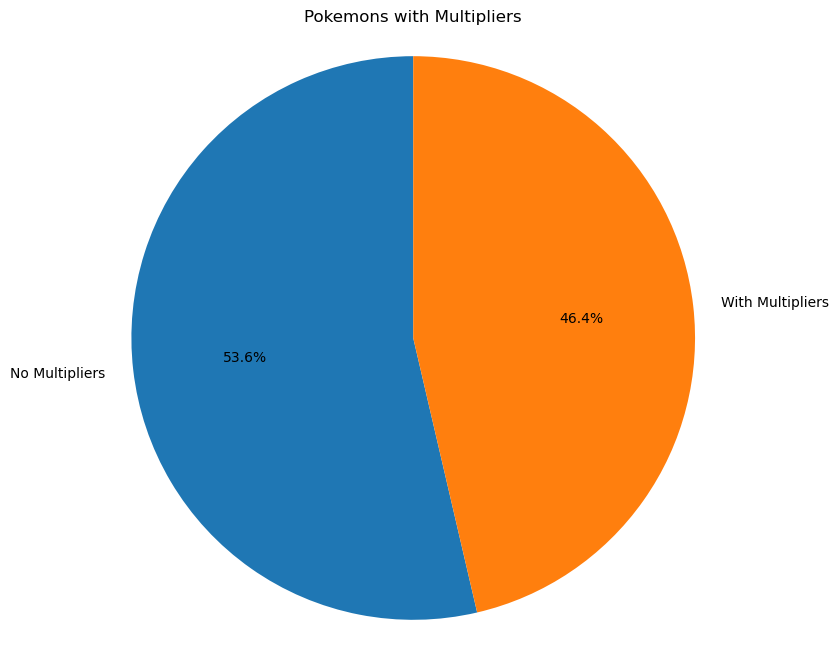

In [46]:

# Get all Pokemons that have no multipliers at all
no_multipliers = pokemon_df[pokemon_df["multipliers"].isna()]

print(no_multipliers)

# Pie chart for Pokemons with no multipliers
plt.figure(figsize=(8, 8))
labels = ["No Multipliers", "With Multipliers"]
sizes = [len(no_multipliers), len(pokemon_df) - len(no_multipliers)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Pokemons with Multipliers")
plt.show()

In [50]:
no_multipliers[["name", "multipliers"]]

,name,multipliers
2,Venusaur,NaN
5,Charizard,NaN
8,Blastoise,NaN
11,Butterfree,NaN
14,Beedrill,NaN
...,...,...
144,Zapdos,NaN
145,Moltres,NaN
148,Dragonite,NaN
149,Mewtwo,NaN


Conclusion:

There are 81 pokemons who have no mulpipliers at all.

Get all Pokemons that do not have more than 2 evolutions

In [51]:
# To find total no of evolutions, we need to find the number of previous evolutions and the number of next evolutions and add them together

# let's first convert the previous evolutions and next evolutions columns to actual list of dictionaries
# while doing so we need to take care of NaN values also
pokemon_df["prev_evolution"] = pokemon_df["prev_evolution"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else np.NaN) 
pokemon_df["next_evolution"] = pokemon_df["next_evolution"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else np.NaN) 

# now we need to create two new columns to store the count of evolutions
pokemon_df["prev_evolution_count"] = pokemon_df["prev_evolution"].apply(lambda x: len(x) if isinstance(x, list) else 0)
pokemon_df["next_evolution_count"] = pokemon_df["next_evolution"].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Find the total number of evolutions
pokemon_df["total_evolutions"] = pokemon_df["prev_evolution_count"] + pokemon_df["next_evolution_count"]

pokemon_df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weaknesses_count,prev_evolution_count,next_evolution_count,total_evolutions
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,69.0,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,4,0,2,2
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,4.2,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4,1,1,2
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,...,1.7,11:30,NaN,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",4,2,0,2
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,25.3,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3,0,2,2
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,1.2,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3,1,1,2


In [52]:
pokemon_df[pokemon_df.total_evolutions >= 3]

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weaknesses_count,prev_evolution_count,next_evolution_count,total_evolutions
132,133,133,Eevee,http://www.serebii.net/pokemongo/pokemon/133.png,['Normal'],0.30 m,6.5 kg,Eevee Candy,25.0,10 km,...,275.0,05:32,"[2.02, 2.64]",[Fighting],"[{'num': '134', 'name': 'Vaporeon'}, {'num': '...",NaN,1,0,3,3


Conclusion:

Only 1 pokemon has more than 2 evolution. Remaining all 150 pokemons do not have more than 2 evolutions.

# Get all Pokemons whose spawn time is less than 300 seconds.

In [53]:
# checking for NaN values in spwan time column
pokemon_df[pokemon_df["spawn_time"].isna()]
# Unique values in spwan time column
pokemon_df["spawn_time"].unique()
def to_sec(x):
    
    l = str(x).split(':')

    return int(l[0])*60 + int(l[1])
# Create a new column with the spwan_time in seconds
pokemon_df['spawn_time_in_sec'] = pokemon_df['spawn_time'].apply(lambda x: to_sec(x) if pd.notna(x) else np.nan)
pokemon_df[pokemon_df["spawn_time_in_sec" ]< 300]

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weaknesses_count,prev_evolution_count,next_evolution_count,total_evolutions,spawn_time_in_sec
6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,['Water'],0.51 m,9.0 kg,Squirtle Candy,25.0,2 km,...,04:25,[2.1],"[Electric, Grass]","[{'num': '008', 'name': 'Wartortle'}, {'num': ...",NaN,2,0,2,2,265.0
8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,['Water'],1.60 m,85.5 kg,Squirtle Candy,NaN,Not in Eggs,...,00:06,NaN,"[Electric, Grass]",NaN,"[{'num': '007', 'name': 'Squirtle'}, {'num': '...",2,2,0,2,6.0
10,11,11,Metapod,http://www.serebii.net/pokemongo/pokemon/011.png,['Bug'],0.71 m,9.9 kg,Caterpie Candy,50.0,Not in Eggs,...,02:11,"[3.55, 3.79]","[Fire, Flying, Rock]","[{'num': '012', 'name': 'Butterfree'}]","[{'num': '010', 'name': 'Caterpie'}]",3,1,1,2,131.0
12,13,13,Weedle,http://www.serebii.net/pokemongo/pokemon/013.png,"['Bug', 'Poison']",0.30 m,3.2 kg,Weedle Candy,12.0,2 km,...,02:21,"[1.01, 1.09]","[Fire, Flying, Psychic, Rock]","[{'num': '014', 'name': 'Kakuna'}, {'num': '01...",NaN,4,0,2,2,141.0
13,14,14,Kakuna,http://www.serebii.net/pokemongo/pokemon/014.png,"['Bug', 'Poison']",0.61 m,10.0 kg,Weedle Candy,50.0,Not in Eggs,...,02:30,"[3.01, 3.41]","[Fire, Flying, Psychic, Rock]","[{'num': '015', 'name': 'Beedrill'}]","[{'num': '013', 'name': 'Weedle'}]",4,1,1,2,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,128,Tauros,http://www.serebii.net/pokemongo/pokemon/128.png,['Normal'],1.40 m,88.4 kg,None,NaN,5 km,...,00:37,NaN,[Fighting],NaN,NaN,1,0,0,0,37.0
129,130,130,Gyarados,http://www.serebii.net/pokemongo/pokemon/130.png,"['Water', 'Flying']",6.50 m,235.0 kg,Magikarp Candy,NaN,Not in Eggs,...,02:15,NaN,"[Electric, Rock]",NaN,"[{'num': '129', 'name': 'Magikarp'}]",2,1,0,1,135.0
134,135,135,Jolteon,http://www.serebii.net/pokemongo/pokemon/135.png,['Electric'],0.79 m,24.5 kg,None,NaN,Not in Eggs,...,02:30,NaN,[Ground],NaN,"[{'num': '133', 'name': 'Eevee'}]",1,1,0,1,150.0
136,137,137,Porygon,http://www.serebii.net/pokemongo/pokemon/137.png,['Normal'],0.79 m,36.5 kg,None,NaN,5 km,...,02:49,NaN,[Fighting],NaN,NaN,1,0,0,0,169.0


Conclusion

There are total 75 pokemon available whose spwan time are less than 300 seconds.

# Get all Pokemon who have more than two types of capabilities

['Grass', 'Poison'] --> Count = 2
['Fire'] --> Count = 1
['Fire', 'Flying'] --> Count = 2
['Water'] --> Count = 1
['Bug'] --> Count = 1
['Bug', 'Flying'] --> Count = 2
['Bug', 'Poison'] --> Count = 2
['Normal', 'Flying'] --> Count = 2
['Normal'] --> Count = 1
['Poison'] --> Count = 1
['Electric'] --> Count = 1
['Ground'] --> Count = 1
['Poison', 'Ground'] --> Count = 2
['Poison', 'Flying'] --> Count = 2
['Bug', 'Grass'] --> Count = 2
['Fighting'] --> Count = 1
['Water', 'Fighting'] --> Count = 2
['Psychic'] --> Count = 1
['Water', 'Poison'] --> Count = 2
['Rock', 'Ground'] --> Count = 2
['Water', 'Psychic'] --> Count = 2
['Water', 'Ice'] --> Count = 2
['Ghost', 'Poison'] --> Count = 2
['Grass', 'Psychic'] --> Count = 2
['Ground', 'Rock'] --> Count = 2
['Grass'] --> Count = 1
['Ice', 'Psychic'] --> Count = 2
['Water', 'Flying'] --> Count = 2
['Rock', 'Water'] --> Count = 2
['Rock', 'Flying'] --> Count = 2
['Ice', 'Flying'] --> Count = 2
['Electric', 'Flying'] --> Count = 2
['Dragon'] --

<Axes: >

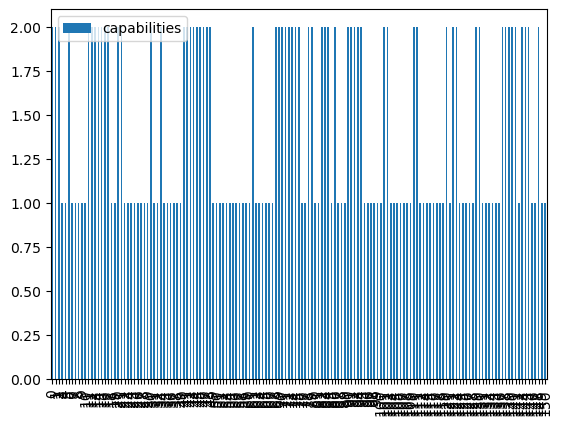

In [54]:
for cap in pokemon_df["type"].unique():
    print(f"{cap} --> Count = {len(ast.literal_eval(cap))}")
 # Converting string list to actual list of strings
pokemon_df["type"] = pokemon_df["type"].apply(lambda x: ast.literal_eval(x))
# Creating new column called 'capabilities' which contains count of types column
pokemon_df["capabilities"] = pokemon_df["type"].apply(lambda x: len(x))
pokemon_df[["name", "capabilities"]].plot(kind="bar")

Conclusion:

There are no pokemon with more than two types of capabilities as we can see that the highest no of capabilities is 2.